In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
from sklearn.datasets import load_digits

In [4]:
digits = load_digits()
X = load_digits().data
y = load_digits().target

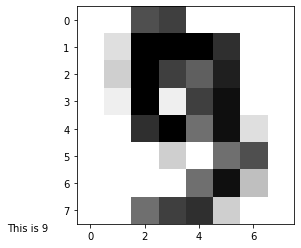

In [5]:
fig = plt.figure()
plt.imshow(digits.images[9],cmap = plt.cm.gray_r)
txt = "This is %d"%digits.target[9]
fig.text(0.1,0.1,txt)
plt.show()

In [12]:
from sklearn.model_selection import KFold
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, precision_score,recall_score

In [28]:
import seaborn as sns

C= 0.5
Acurácia com SVM Linear: 0.9839 +/- 0.0078
C= 0.3333
Acurácia com SVM Linear: 0.9788 +/- 0.0063
C= 0.25
Acurácia com SVM Linear: 0.9744 +/- 0.0091
C= 0.2
Acurácia com SVM Linear: 0.9716 +/- 0.0098
C= 0.1667
Acurácia com SVM Linear: 0.9672 +/- 0.0087
C= 0.1429
Acurácia com SVM Linear: 0.9655 +/- 0.0084
C= 0.125
Acurácia com SVM Linear: 0.9621 +/- 0.0076
C= 0.1111
Acurácia com SVM Linear: 0.9605 +/- 0.0106
C= 0.1
Acurácia com SVM Linear: 0.9538 +/- 0.0102
C= 0.0909
Acurácia com SVM Linear: 0.9510 +/- 0.0067
C= 0.0833
Acurácia com SVM Linear: 0.9527 +/- 0.0139
C= 0.0769
Acurácia com SVM Linear: 0.9505 +/- 0.0173
C= 0.0714
Acurácia com SVM Linear: 0.9471 +/- 0.0068
C= 0.0667
Acurácia com SVM Linear: 0.9427 +/- 0.0112
C= 0.0625
Acurácia com SVM Linear: 0.9410 +/- 0.0122
C= 0.0588
Acurácia com SVM Linear: 0.9416 +/- 0.0134
C= 0.0556
Acurácia com SVM Linear: 0.9366 +/- 0.0096
C= 0.0526
Acurácia com SVM Linear: 0.9360 +/- 0.0080
C= 0.05
Acurácia com SVM Linear: 0.9366 +/- 0.0147


<AxesSubplot:>

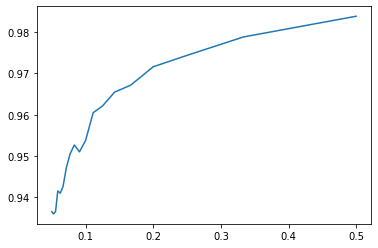

In [42]:
acuracia = []
fold = list(range(2, 21))
gamas = []
for n in fold:
    numeroFolds = 5
    g = 1/n
    kf = KFold(n_splits=numeroFolds, shuffle=True)

    svm = SVC(kernel='rbf', C=g)
    scores = cross_val_score(svm, X, y, cv=kf)
    print(f'C= {round(g, 4)}')
    print('Acurácia com SVM Linear: %0.4f +/- %0.4f' % (scores.mean(), scores.std()))

    acuracia.append(scores.mean())
    gamas.append(g)

sns.lineplot(x=gamas, y=acuracia) 


In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=10)
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

In [44]:
print('Acurácia:', accuracy_score(y_test, y_pred))
print('Precisão:',precision_score(y_test, y_pred, average='macro'))
print('Sensitividade:',recall_score(y_test, y_pred, average='macro'))

Acurácia: 0.8555555555555555
Precisão: 0.8562347068334242
Sensitividade: 0.8545003099047218
